In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import subprocess
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_store = pd.read_csv("stores data-set.csv")
df_feature = pd.read_csv("Features data set.csv",parse_dates=["Date"])
df_sales = pd.read_csv("sales data-set.csv",parse_dates=["Date"])

In [3]:
print(df_store.info())
print(df_store.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB
None
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [4]:
print(df_feature.info())
print(df_feature.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null datetime64[ns]
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 711.9 KB
None
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-05-02        42.31       2.572        NaN        NaN        NaN   
1      1 2010-12-02        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26       

In [5]:
print(df_sales.info())
print(df_sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None
   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-05-02      24924.50      False
1      1     1 2010-12-02      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-05-03      21827.90      False


In [6]:
data_date = df_feature.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"})
data_date = data_date.sort_index()
temp_date_data = data_date[:'2012-12-10']

data_sales_date = df_sales.groupby("Date").agg({"Weekly_Sales":"sum"})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)
data = pd.merge(data_sales_date, temp_date_data, left_index=True,right_index=True, how='left')
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False )

In [7]:
print(data.describe())

       Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment
count    143.000000   143.000000  143.000000  143.000000    143.000000
mean      46.601399    60.663782    3.358607  171.578394      7.999151
std        5.399713    15.172792    0.429401    3.100148      0.483853
min       39.000000    30.480889    2.672067  167.546485      6.953711
25%       44.000000    47.720222    2.885367  168.408144      7.508333
50%       46.000000    61.051111    3.488644  171.386189      8.150133
75%       47.000000    74.697333    3.726133  174.724576      8.428578
max       80.000000    82.176444    3.997778  176.652613      8.619311


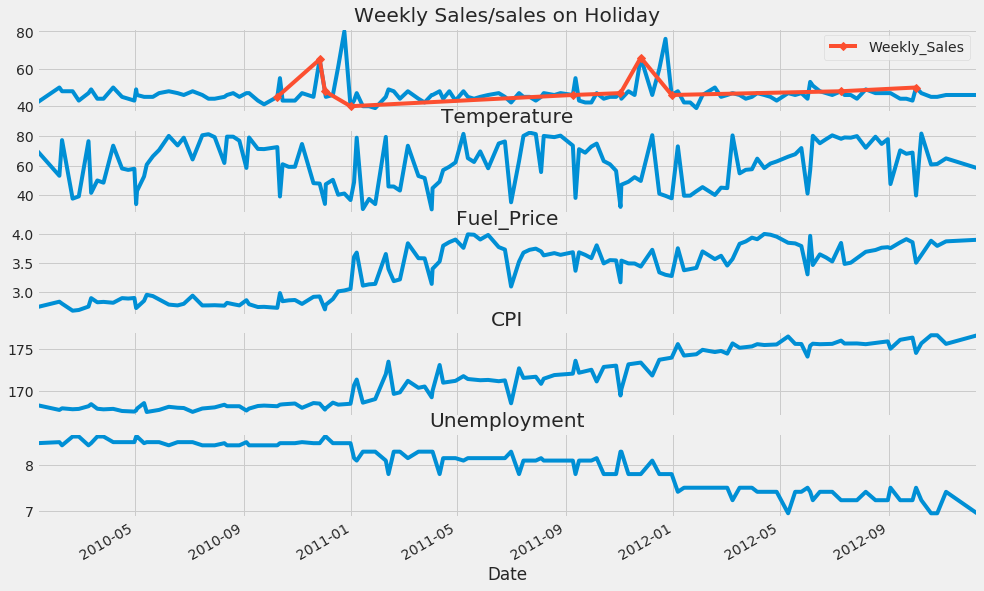

In [8]:
plt.style.use('fivethirtyeight')
#plt.figure(figsize=(15,4))
fig, ax = plt.subplots(5,1,figsize=(15,10),sharex=True) 
data["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales/sales on Holiday")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker="D",ax=ax[0],legend="Holiday Week sale")
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")

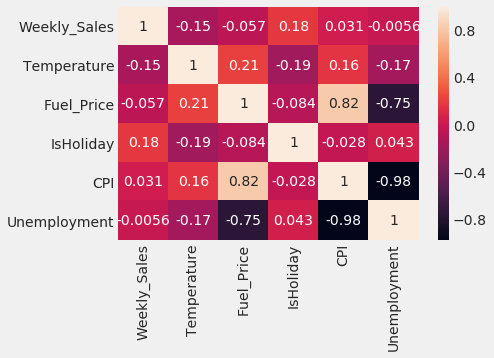

In [9]:
sns.heatmap(data.corr(),annot=True)

Text(0, 0.5, 'Sales')

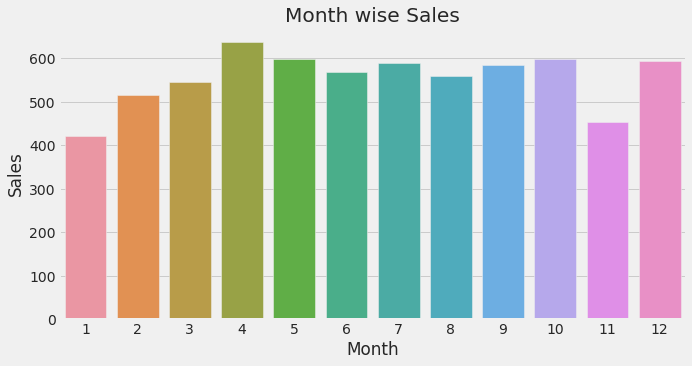

In [10]:
data_sales_month = data.groupby(data.index.month).agg({"Weekly_Sales":"sum"})
plt.figure(figsize=(10, 5))
sns.barplot(x=data_sales_month.index,y=data_sales_month.Weekly_Sales)
plt.title("Month wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

Text(0, 0.5, 'Sales')

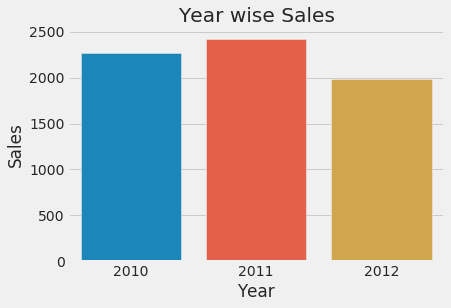

In [11]:
data_sales_year = data.groupby(data.index.year).agg({"Weekly_Sales":"sum"})

sns.barplot(x=data_sales_year.index,y=data_sales_year.Weekly_Sales)
plt.title("Year wise Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Weekly_Sales"], period=45)

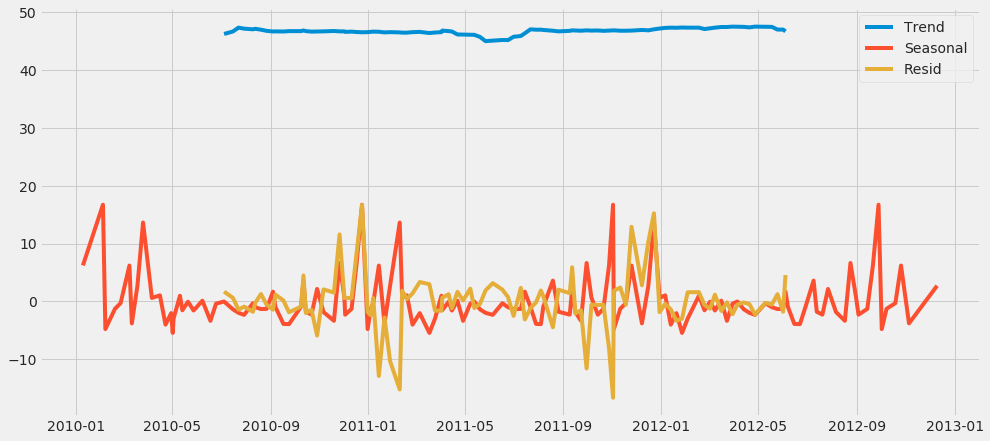

In [13]:
plt.figure(figsize=(15, 7))
plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
plt.legend(["Trend", "Seasonal","Resid"], loc ="upper right") 

In [14]:
data_Store = df_feature.groupby("Store").agg({"Temperature":"mean","Fuel_Price":"mean","IsHoliday":"sum"})

temp_store = df_sales.groupby("Store").agg({"Weekly_Sales":"sum"})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)
data_Store.set_index(np.arange(0,45),inplace=True)
df_store["temp"] = data_Store.Temperature
df_store["Fuel_Price"] = data_Store.Fuel_Price
df_store["holiday"] = data_Store.IsHoliday
df_store["Weekly_Sales"] = temp_store.Weekly_Sales

In [15]:
df_store.describe()

,Store,Size,temp,Fuel_Price,holiday,Weekly_Sales
count,45.000000,45.000000,45.000000,45.000000,45.0,44.000000
mean,23.000000,130287.600000,59.356198,3.405992,13.0,150.090909
std,13.133926,63825.271991,9.956122,0.153935,0.0,78.780478
min,1.000000,34875.000000,37.921264,3.245945,13.0,37.000000
25%,12.000000,70713.000000,51.866319,3.259242,13.0,78.500000
50%,23.000000,126512.000000,58.107912,3.328764,13.0,140.500000
75%,34.000000,202307.000000,68.504670,3.497874,13.0,200.750000
max,45.000000,219622.000000,75.438077,3.643654,13.0,301.000000


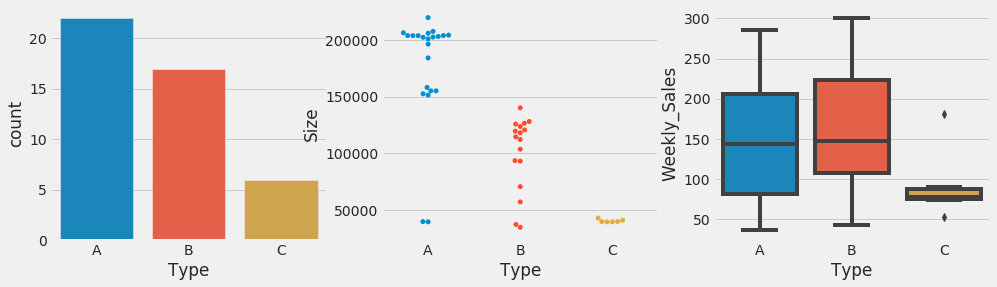

In [16]:
fig,ax = plt.subplots(1,3,figsize=(15, 4))
sns.countplot(df_store.Type,ax=ax[0])
sns.swarmplot(data = df_store,y="Size",x="Type",ax=ax[1])

sns.boxplot(data = df_store,y="Weekly_Sales",x="Type",ax=ax[2])

In [17]:
len(df_sales["Dept"].unique())

81

In [18]:
data_Dept = df_sales.groupby("Dept").agg({"Weekly_Sales":"sum"})
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales/10000
data_Dept.Weekly_Sales = data_Dept.Weekly_Sales.apply(int)
data_Dept.sort_values(by="Weekly_Sales")

,Weekly_Sales
Dept,
39,0
78,0
43,0
47,0
51,3
77,4
45,4
99,35
54,51


Text(0.5, 0, 'Department')

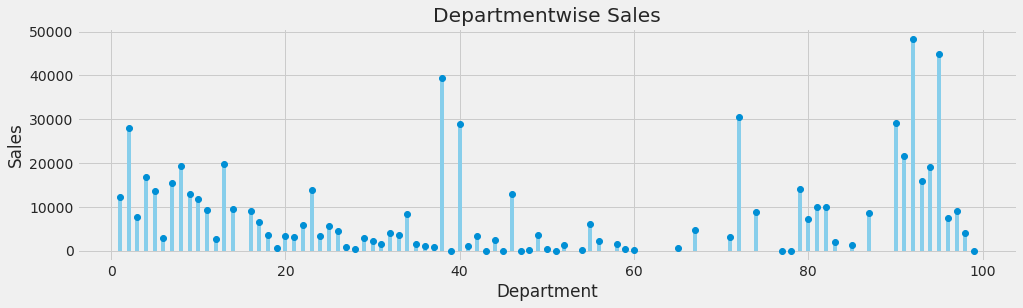

In [19]:
fig1, ax1 = plt.subplots(figsize=(15, 4))
#ordered_df = data_Dept.sort_values(by='Weekly_Sales')
plt.vlines(x=data_Dept.index, ymin=0, ymax=data_Dept['Weekly_Sales'], color='skyblue')
plt.plot(data_Dept.index,data_Dept['Weekly_Sales'], "o")
plt.title("Departmentwise Sales")
plt.ylabel("Sales")
plt.xlabel("Department")

In [20]:
sales_date_store = df_sales.groupby(["Date","Store"]).agg({"Weekly_Sales":"sum"})
sales_date_store.sort_index(inplace=True)
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales/10000
sales_date_store.Weekly_Sales = sales_date_store.Weekly_Sales.apply(int)
data_table = pd.merge(df_feature,sales_date_store ,  how='left', on=["Date","Store"])
data_table = pd.merge(data_table,df_store[["Store","Type"]] ,  how='left', on=["Store"])
data_table.head(20)
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]

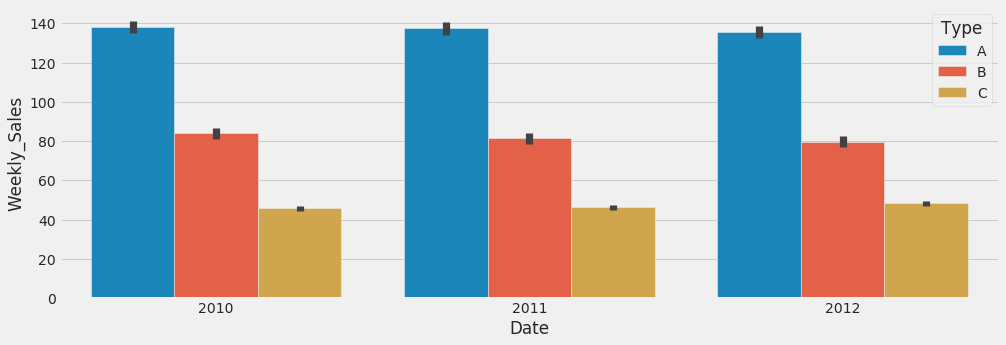

In [21]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data_train.Date.dt.year, y=data_train.Weekly_Sales,hue=data_train.Type)

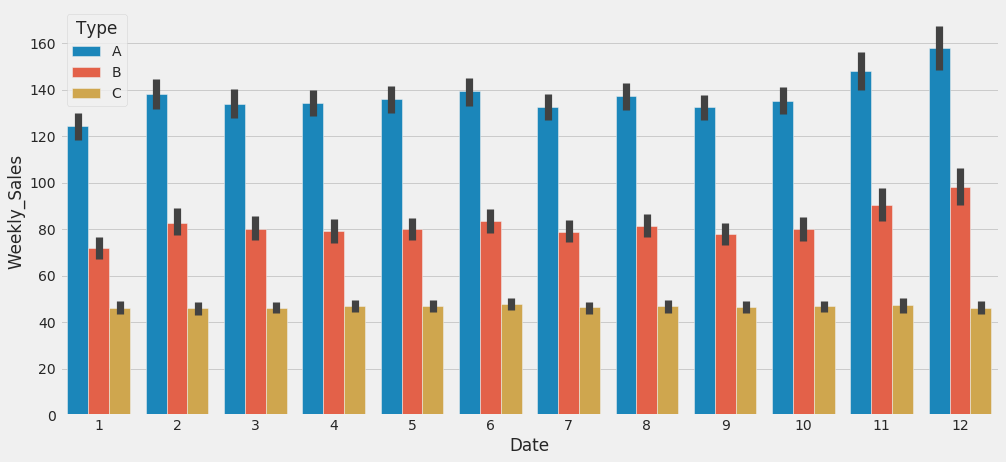

In [22]:
plt.figure(figsize=(15, 7))
sns.barplot(x=data_train.Date.dt.month, y=data_train.Weekly_Sales,hue=data_train.Type)

Text(0.5, 0, 'Date')

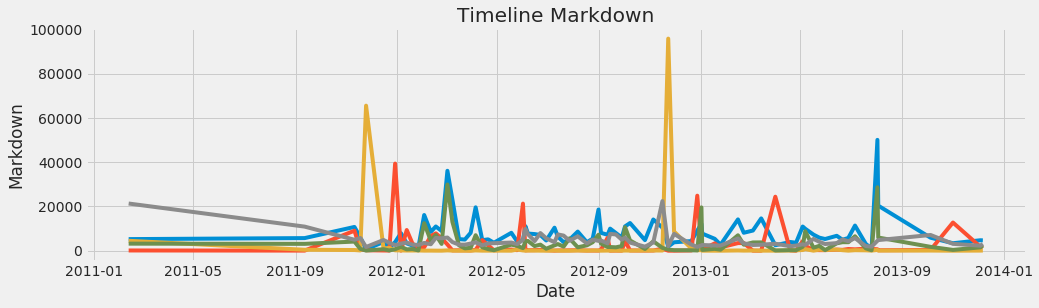

In [23]:
plt.figure(figsize=(15,4))
train_markdown = data_table[data_table.MarkDown2.notnull()]
train_markdown = train_markdown.groupby("Date").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})


plt.plot(train_markdown.index,train_markdown.MarkDown1)
plt.plot(train_markdown.index,train_markdown.MarkDown2)
plt.plot(train_markdown.index,train_markdown.MarkDown3)
plt.plot(train_markdown.index,train_markdown.MarkDown4)
plt.plot(train_markdown.index,train_markdown.MarkDown5)
plt.title("Timeline Markdown")
plt.ylabel("Markdown")
plt.xlabel("Date")

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/plotting/_core.py:2410: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


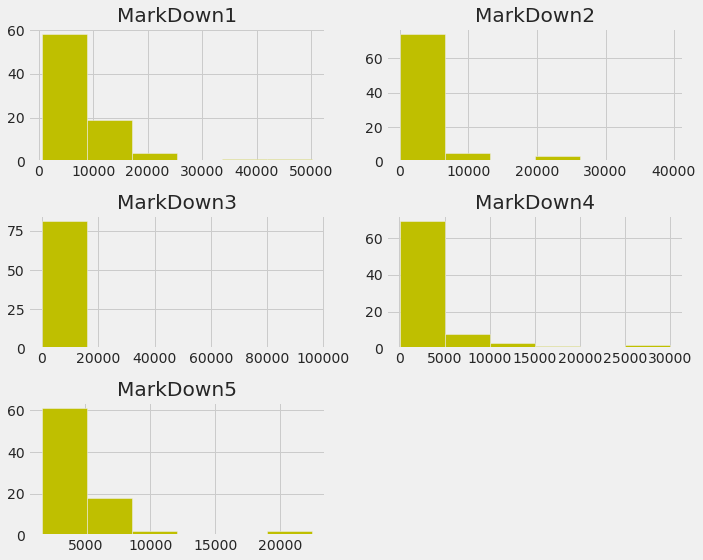

In [24]:
train_markdown.hist(figsize=(10,8),bins=6,color='Y')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Markdown')

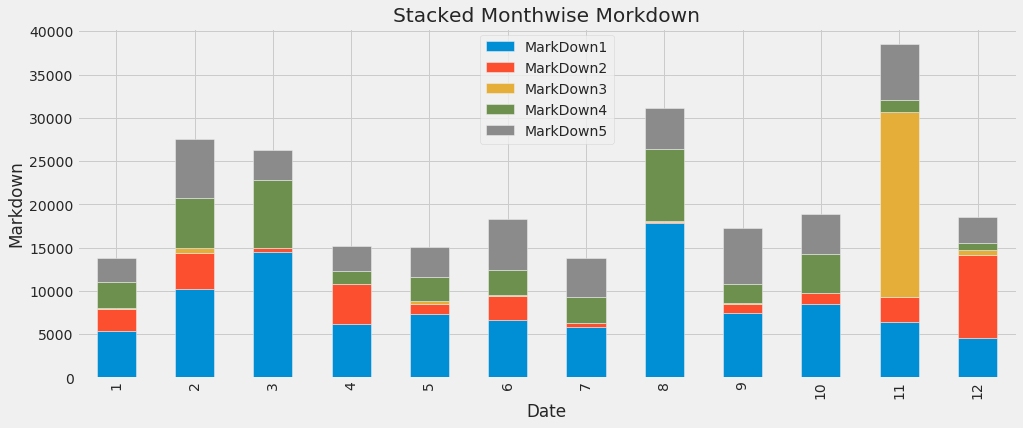

In [25]:
train_markdown_month = train_markdown.groupby(train_markdown.index.month).agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

train_markdown_month.plot(kind='bar', stacked=True,figsize=(15,6))
plt.title("Stacked Monthwise Morkdown")
plt.ylabel("Markdown")

Text(0, 0.5, 'Markdown')

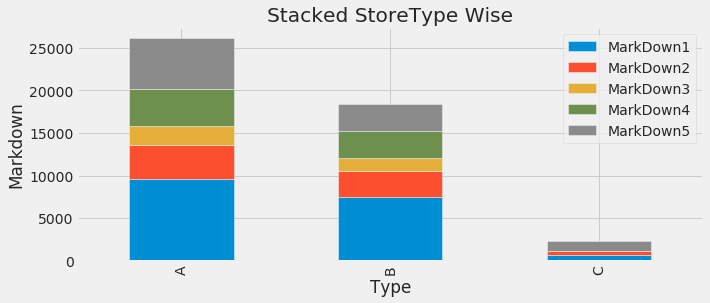

In [26]:
train_markdown_1 = data_table[data_table.MarkDown2.notnull()]
train_markdown_type = train_markdown_1.groupby("Type").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

train_markdown_type.plot(kind='bar', stacked=True,figsize=(10,4))
plt.title("Stacked StoreType Wise")
plt.ylabel("Markdown")

In [27]:
from fancyimpute import IterativeImputer
from sklearn.metrics import mean_squared_error

from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.linear_model import ElasticNet, Lasso, RidgeCV,LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

ModuleNotFoundError: No module named 'fancyimpute'

In [28]:
# imputing the missing value
itt = IterativeImputer()
df = itt.fit_transform(data_table[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]]) 
data_table.MarkDown1 = df[:,0]
data_table.MarkDown2 = df[:,1]
data_table.MarkDown3 = df[:,2]
data_table.MarkDown4 = df[:,3]
data_table.MarkDown5 = df[:,4]

data_table['CPI'].fillna((data_table['CPI'].mean()), inplace=True)
data_table['Unemployment'].fillna((data_table['Unemployment'].mean()), inplace=True)
data_table['IsHoliday'] = data_table['IsHoliday'].map({True:0,False:1})

#create new column
data_table["Month"] = data_table.Date.dt.month
data_table["Year"] = data_table.Date.dt.year
data_table["WeekofYear"] = data_table.Date.dt.weekofyear
data_table.drop(['Date'],axis=1,inplace=True)

#create dummies out of categorical column
data_table = createdummies(data_table,["Type","Month","Year","WeekofYear"])

NameError: name 'IterativeImputer' is not defined

In [29]:
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]
X = data_train.drop('Weekly_Sales', axis=1)
y = data_train['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
classifiers = [
    LinearRegression(),
    ElasticNet(),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=2.5),
    Lasso(alpha =16, random_state=100),
    ElasticNet(alpha=0.8),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    SVR(), 
    LinearSVR(), 
    NuSVR(),
    xgb.XGBRegressor(),
    lgb.LGBMRegressor()
    ]

name = []
score = []
models = []
rmse = []
i = 0
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    name.append(type(classifier).__name__)
    score.append(classifier.score(X_test, y_test))
    models.append(classifier)
    rmse.append(np.sqrt(mean_squared_error(classifier.predict(X_test), y_test)))

NameError: name 'LinearRegression' is not defined

In [31]:
df_score = pd.DataFrame(list(zip(name,rmse, score, models)),columns=['name','rmse','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'],inplace=True)
df_score

NameError: name 'name' is not defined

In [32]:
model = df_score.loc["XGBRegressor","model"]
data_test.drop(['Weekly_Sales'],axis=1,inplace=True)
predict = model.predict(data_test)
predict

NameError: name 'df_score' is not defined